In [214]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [215]:
# Step 1: Load the dataset
data = pd.read_csv("Downloads/bank-full(1).csv", delimiter = ";")
data.rename(columns={'y':'deposit'}, inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [216]:
data.shape

(45211, 17)

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [218]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [219]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [220]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [221]:
data.tail

<bound method NDFrame.tail of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [222]:
data.isnull().sum().sum()

0

In [223]:
data.duplicated().sum()

0

In [224]:
data.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

In [225]:
data.drop(['month', 'day'], axis=1, inplace=True)
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no


In [226]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data_encoded = data.apply(lb.fit_transform)
data_encoded

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit
0,40,4,1,2,0,3036,1,0,2,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,508,3,0,0,3,0


# Label encoder

In [227]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [228]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no


In [229]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

data['deposit']= label_encoder.fit_transform(data['deposit'])

data['deposit'].unique()


array([0, 1])

In [230]:
data['marital']=label_encoder.fit_transform(data['marital'])
data['marital'].unique()

array([1, 2, 0])

In [231]:
data['job']=label_encoder.fit_transform(data['job'])
data['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [232]:
data['education']=label_encoder.fit_transform(data['education'])
data['education'].unique()

array([2, 1, 3, 0])

In [233]:
data['default']=label_encoder.fit_transform(data['default'])
data['default'].unique()

array([0, 1])

In [234]:
data['loan']=label_encoder.fit_transform(data['loan'])
data['loan'].unique()

array([0, 1])

In [235]:
data['housing']=label_encoder.fit_transform(data['housing'])
data['housing'].unique()

array([1, 0])

In [236]:
data['contact']=label_encoder.fit_transform(data['contact'])
data['contact'].unique()

array([2, 0, 1])

In [237]:
data['poutcome']=label_encoder.fit_transform(data['poutcome'])
data['poutcome'].unique()

array([3, 0, 1, 2])

# correlation

<Axes: >

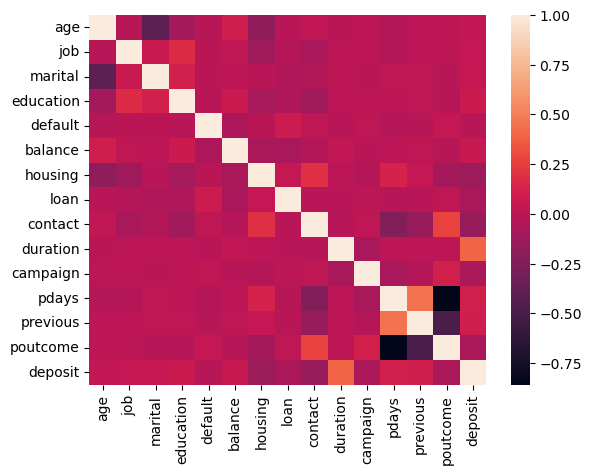

In [238]:
sns.heatmap(data.corr())

                age       job   marital  education   default   balance  \
age        1.000000 -0.021868 -0.403240  -0.106807 -0.017879  0.097783   
job       -0.021868  1.000000  0.062045   0.166707 -0.006853  0.018232   
marital   -0.403240  0.062045  1.000000   0.108576 -0.007023  0.002122   
education -0.106807  0.166707  0.108576   1.000000 -0.010718  0.064514   
default   -0.017879 -0.006853 -0.007023  -0.010718  1.000000 -0.066745   
balance    0.097783  0.018232  0.002122   0.064514 -0.066745  1.000000   
housing   -0.185513 -0.125363 -0.016096  -0.090790 -0.006025 -0.068768   
loan      -0.015655 -0.033004 -0.046893  -0.048574  0.077234 -0.084350   
contact    0.026221 -0.082063 -0.039201  -0.110928  0.015404 -0.027273   
duration  -0.004648  0.004744  0.011852   0.001935 -0.010021  0.021560   
campaign   0.004760  0.006839 -0.008994   0.006255  0.016822 -0.014578   
pdays     -0.023758 -0.024455  0.019172   0.000052 -0.029979  0.003435   
previous   0.001288 -0.000911  0.01497

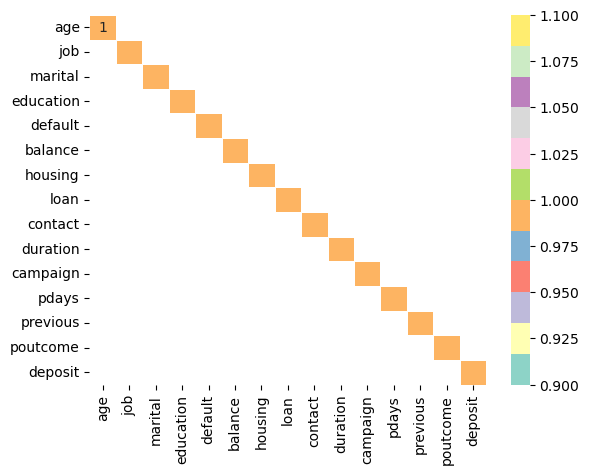

In [239]:
corr = data.corr()
print(corr)
corr = corr[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.5)
plt.show()

<Axes: xlabel='job', ylabel='count'>

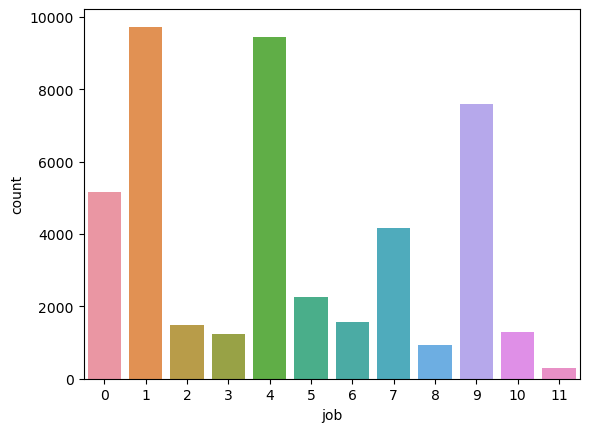

In [240]:
sns.countplot(x = "job",data = data)

<Axes: xlabel='job', ylabel='count'>

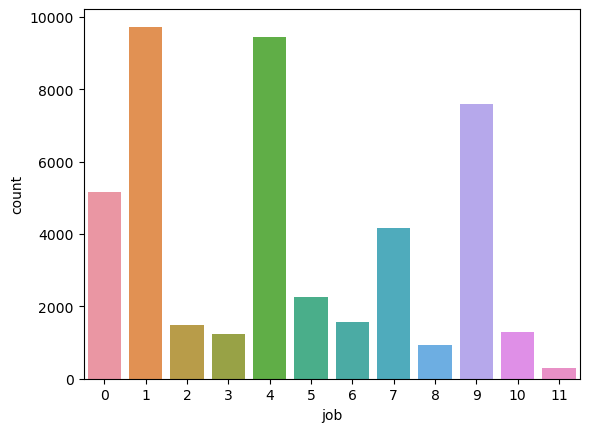

In [241]:
sns.countplot(x = "job",data = data)

In [242]:
x = data_encoded.drop('deposit',axis=1)  # independent variable
y = data_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(45211, 14)
(45211,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [243]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33908, 14)
(11303, 14)
(33908,)
(11303,)


In [244]:
X_train.shape

(31647, 16)

In [300]:
X_test.shape

(13564, 16)

In [245]:
y_train.shape

(33908,)

In [301]:
y_test.shape

(11303,)

In [302]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [248]:
# Eval Model

In [315]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

In [316]:
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [317]:
mscore(dtc)

Training Score 0.9016161377845936
Testing Score 0.9009997345837388


In [318]:
ypred_dtc = dtc.predict(x_test)
print(ypred_dtc)

[0 0 0 ... 0 0 0]


In [319]:
eval_model(y_test,ypred_dtc)

Accuracy_Score 0.9009997345837388
Confusion Matrix
 [[9762  236]
 [ 883  422]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      9998
           1       0.64      0.32      0.43      1305

    accuracy                           0.90     11303
   macro avg       0.78      0.65      0.69     11303
weighted avg       0.89      0.90      0.89     11303



In [320]:
dtc.feature_importances_

array([0.04925329, 0.        , 0.00255934, 0.        , 0.00161519,
       0.00456703, 0.03520575, 0.        , 0.04753315, 0.57910216,
       0.00072954, 0.09163143, 0.        , 0.18780313])